In [1]:
#sqlAlchemy challenge

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base = automap_base()
base.prepare(engine, reflect= True)

# reflect the tables

In [7]:
 # We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
station = base.classes.station
measurement = base.classes.measurement

In [9]:
 # Create our session (link) from Python to the DB
session = Session(engine)

Exploratory Climate Analysis

In [18]:
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x24ff4846908>,
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397'}

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
last_item = session.query(measurement).order_by(measurement.id.desc()).first()
last_item.__dict__

#   2016-08-23



{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x24fe24317f0>,
 'id': 19550,
 'tobs': 76.0,
 'date': '2017-08-23',
 'prcp': 0.45,
 'station': 'USC00516128'}

In [22]:
qry = session.query(measurement.prcp, measurement.date).filter((measurement.date <= '2017-08-23'),
                                                               (measurement.date >= '2016-08-23'))
qry

<AxesSubplot:xlabel='Date', ylabel='Inches'>

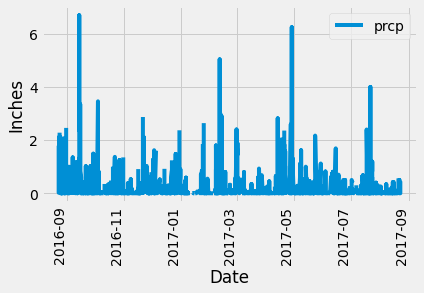

In [38]:

# Perform a query to retrieve the data and precipitation scores
qry = session.query(measurement.prcp, measurement.date).filter((measurement.date <= '2017-08-23'), (measurement.date >= '2016-08-23'))

# Save the query results as a Pandas DataFrame and set the index to the date column
measurement_df = pd.DataFrame(columns=['prcp', 'date'])
measurement_df = pd.read_sql(qry.statement, qry.session.bind)

#measurement_df = measurement_df.rename(columns={})

# Sort the dataframe by date
measurement_df['date'] = pd.to_datetime(measurement_df['date'])
measurement_df = measurement_df.sort_values(by=['date'])
#measurement_df = measurement_df.set_index(['date'])

measurement_df.plot(x='date', y='prcp', rot=90, xlabel='Date', ylabel='Inches',)

6.7
2230
2017-01-10    7
2016-10-06    7
2016-08-24    7
2016-12-02    7
2016-09-14    7
             ..
2017-08-09    3
2017-08-05    3
2017-08-22    3
2017-08-20    3
2017-08-12    3
Name: date, Length: 366, dtype: int64


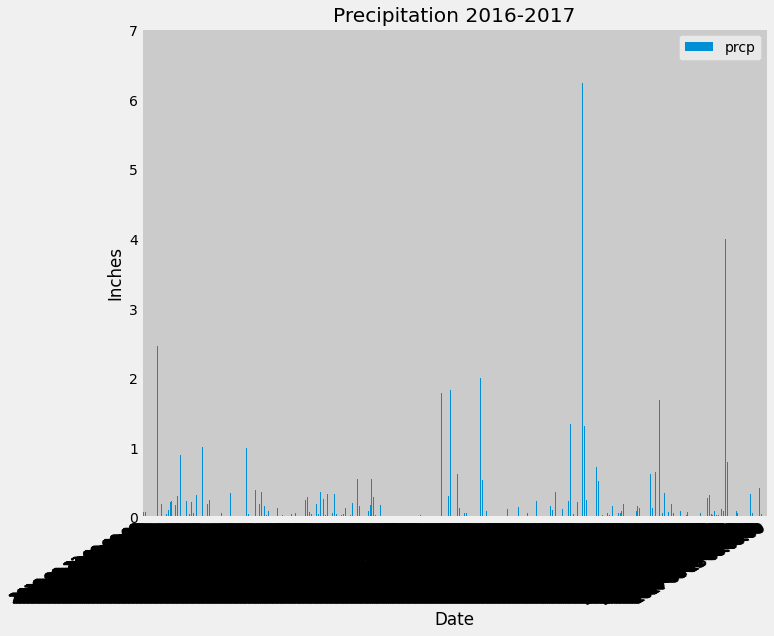

In [36]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=[10,10])
prcp_bar = measurement_df.plot(kind='bar', x='date', y='prcp', legend=True, ax=ax,
                               xlabel='Date', ylabel='Inches', , rot = 90)

prcp_bar.legend(loc=1)
ax.figure.autofmt_xdate()
#plt.show()

In [81]:
# Use Pandas to calcualte the summary statistics for the precipitation data 
measurement_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# Design a query to show how many stations are available in this dataset?
 

In [15]:
 # What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

In [16]:
 # Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

In [17]:
 # Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

Bonus

In [18]:
 # This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'session' is not defined

In [19]:
 # Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

In [20]:
 # Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

In [21]:
 # Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

In [22]:
 # Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

NameError: name 'Measurement' is not defined

In [23]:
 # calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

In [24]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
 

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`